In [19]:
import pandas as pd  # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns  # for visualization
import scipy.stats as stat

In [20]:
data=pd.read_csv("Downloads/Sales_data_zone_wise.csv")

In [21]:
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [22]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [24]:
#XYZ Company has offices in four different zones. The company wishes toinvestigate the following :
#1)The mean sales generated by each zone.

data.mean()

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

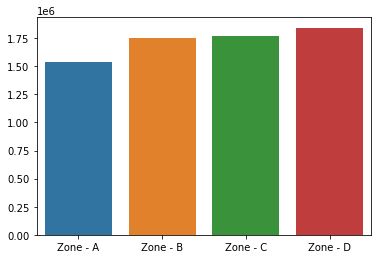

In [25]:
l=data.mean()
m=sns.barplot(x=['Zone - A','Zone - B','Zone - C','Zone - D'],y=l)
plt.show()

In [26]:
#2)Total sales generated by all the zones for each month

data1=['Zone - A','Zone - B','Zone - C','Zone - D']
data['total_sales']=data[data1].sum(axis=1)
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,total_sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [27]:
#3)Check whether all the zones generate the same amount of sales.

data['Zone - A'].equals(data['Zone - B'])

False

In [28]:
data['Zone - B'].equals(data['Zone - C'])

False

In [29]:
data['Zone - C'].equals(data['Zone - D'])

False

In [30]:
data['Zone - A'].equals(data['Zone - C'])

False

In [31]:
data['Zone - A'].equals(data['Zone - D'])

False

In [32]:
data['Zone - B'].equals(data['Zone - D'])

False

H0= All zones generate same amount of sales. 
H1= all zones  generate different amount of sales.

In [36]:
stat.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

<AxesSubplot:>

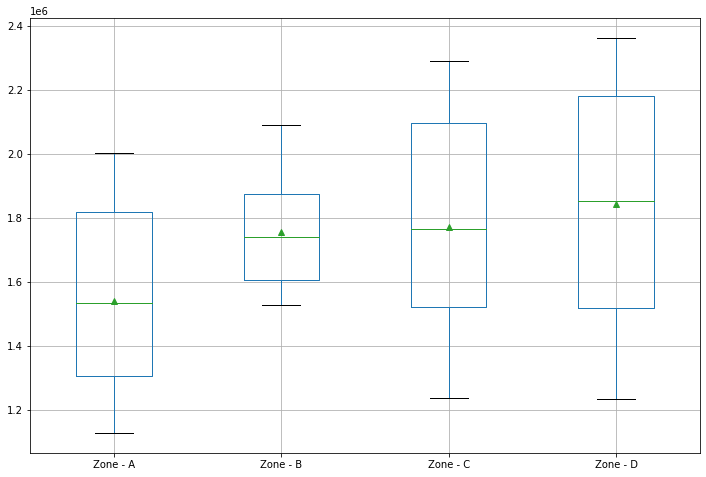

In [37]:
data.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'],figsize=(12,8),showmeans=True)


<AxesSubplot:>

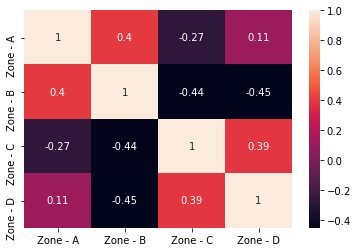

In [38]:
sns.heatmap(data[['Zone - A','Zone - B','Zone - C','Zone - D']].corr(),annot=True)


Insights:
Since the cal. p-value<0.05 we can reject null hypothesis. We can a change in sales in the sales table itself. This is confirmed by F-test. Spending same amount all these zones is not advisable its clear from correlation and F-test.
    